In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from causalimpact import CausalImpact

plt.style.use('ggplot')

In [2]:
ti = pd.date_range(start='2020-01-01',
                  end='2020-07-31')

In [3]:
def response_func(x, a, b):
    return a*x + b

In [4]:
xdata = np.random.randn(len(ti)) + 5
y_raw = response_func(xdata, 2, 1)

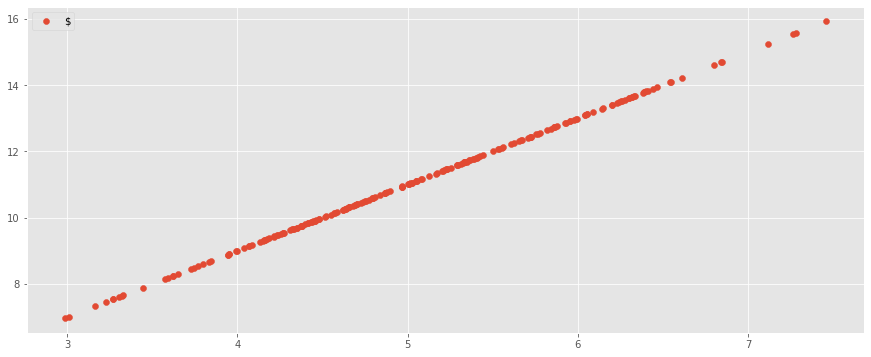

In [5]:
plt.figure(figsize=(15,6));
plt.scatter(xdata, y_raw)
plt.legend('$y = ax + b$');

In [6]:
y_noise = (0.1 * y_raw + np.random.normal(size=xdata.size))

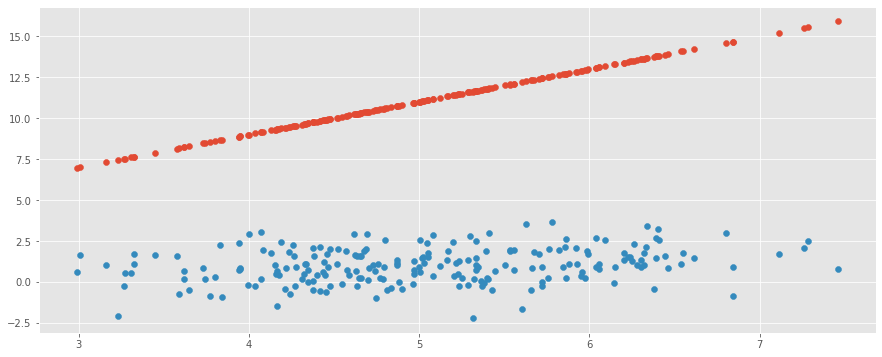

In [7]:
plt.figure(figsize=(15,6));
plt.scatter(xdata, y_raw)
plt.scatter(xdata, y_noise)

In [9]:
y_data = y_raw + y_noise

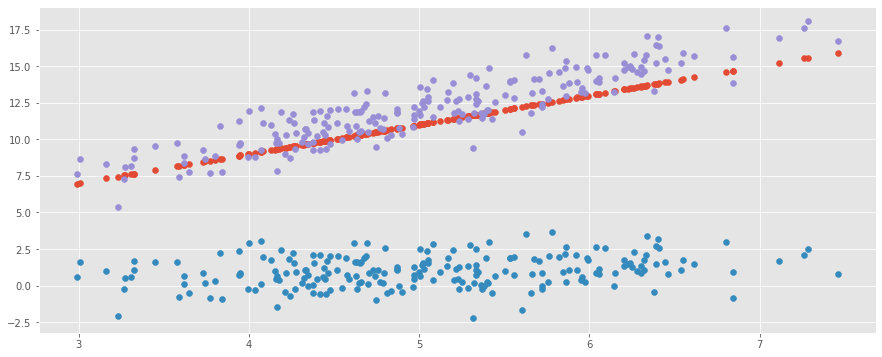

In [10]:
plt.figure(figsize=(15,6));
plt.scatter(xdata, y_raw)
plt.scatter(xdata, y_noise)
plt.scatter(xdata, y_data)

In [13]:
df = pd.DataFrame({'y':y_data, 
                  'X':xdata},
                  index=ti)

In [14]:
df.head()

,y,X
2020-01-01,15.787251,5.628238
2020-01-02,9.284761,4.069067
2020-01-03,12.540826,5.445833
2020-01-04,12.720669,5.334732
2020-01-05,12.825380,5.559929


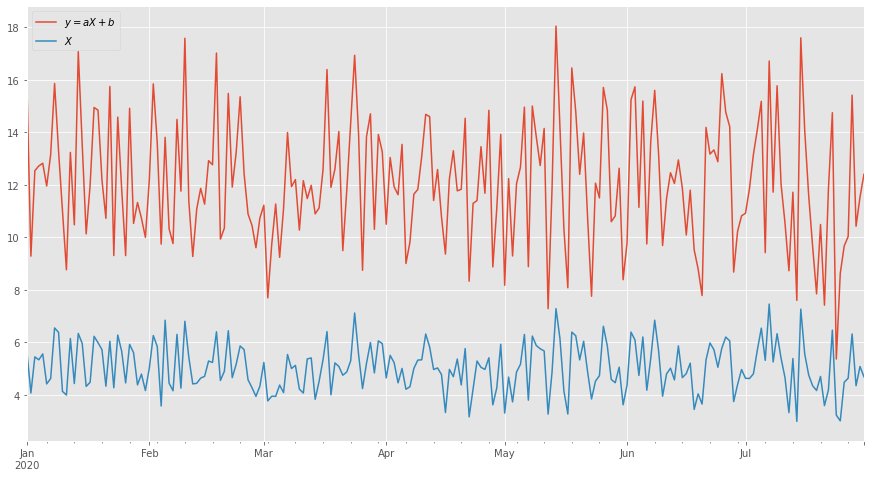

In [18]:
df.plot(figsize=(15, 8));
plt.legend(['$y = aX + b$', '$X$']);

In [19]:
df['y'].loc['2020-07-01':] = df['y'].loc['2020-07-01':] + 5 

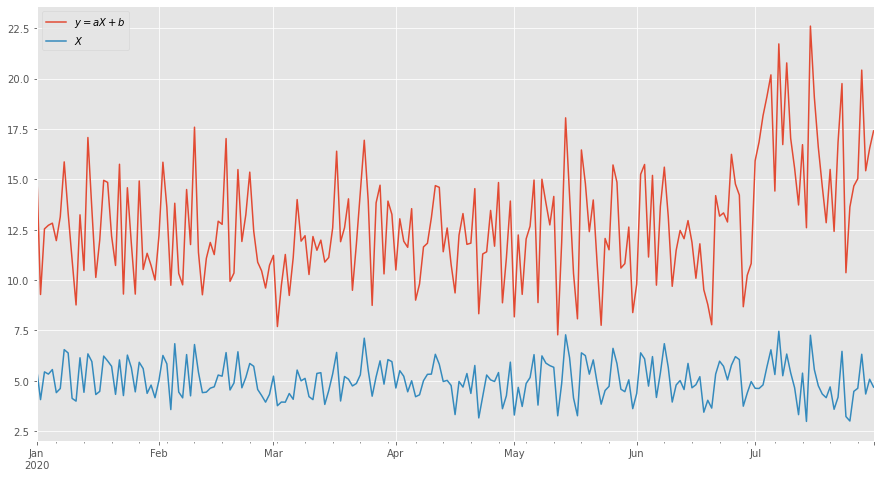

In [20]:
df.plot(figsize=(15, 8));
plt.legend(['$y = aX + b$', '$X$']);

In [21]:
prePeriod = ['2020-01-01','2020-06-30']
postPeriod = ['2020-07-01','2020-07-31']

In [22]:
ciModel = CausalImpact(df, prePeriod, postPeriod)

/home/ronggolawe/anaconda3/lib/python3.8/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: standardize, nseasons. After release 0.14, this will raise.
  warnings.warn(


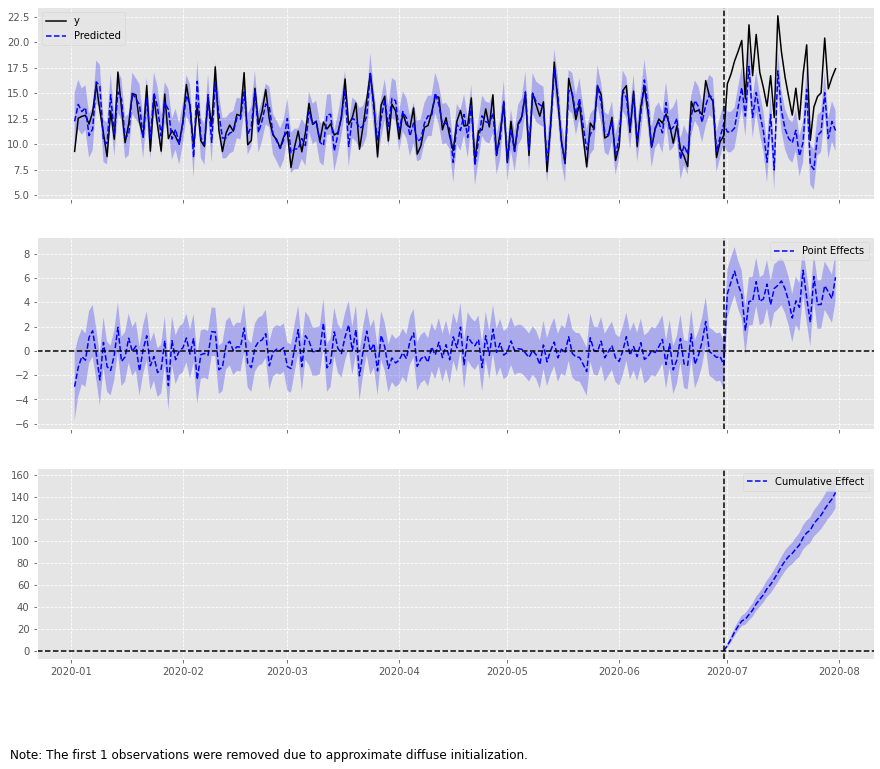

In [23]:
ciModel.plot()

In [24]:
print(ciModel.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    16.56              513.24
Prediction (s.d.)         11.91 (0.24)       369.1 (7.38)
95% CI                    [11.43, 12.37]     [354.43, 383.37]

Absolute effect (s.d.)    4.65 (0.24)        144.14 (7.38)
95% CI                    [4.19, 5.12]       [129.87, 158.82]

Relative effect (s.d.)    39.05% (2.0%)      39.05% (2.0%)
95% CI                    [35.19%, 43.03%]   [35.19%, 43.03%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


In [25]:
4.65 / 5

0.93

In [26]:
print(ciModel.summary(output='report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 16.56. By contrast, in the absence of an
intervention, we would have expected an average response of 11.91.
The 95% interval of this counterfactual prediction is [11.43, 12.37].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 4.65 with a 95% interval of
[4.19, 5.12]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 513.24.
By contrast, had the intervention not taken place, we would have expected
a sum of 369.1. The 95% interval of this prediction is [354.43, 383.37].


The above results are given in terms of absolute numbers. In relative
terms, the response variable s